# INCEPTION V3


## Import Libraries

In [23]:
import os
import cv2
import PIL
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential, load_model, model_from_json, Model


## Input Dataset

In [25]:
img1 =image.load_img('/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/GrapevineLeafDataset/train/Ak/Ak_original_Ak (76).png_5871cc1b-87b3-413f-b900-f2309990df01.png')

In [26]:
train_dir ='/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/GrapevineLeafDataset/train'

In [27]:
cv2.imread('/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/GrapevineLeafDataset/train/Ak/Ak_original_Ak (76).png_5871cc1b-87b3-413f-b900-f2309990df01.png').shape

(511, 511, 3)

In [28]:
input_shape = (511, 511, 3)

inception = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

In [29]:
for layer in inception.layers:
    layer.trainable = False

In [30]:
valid_dir ='/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/GrapevineLeafDataset/valid'

## Preprocessing Data

In [36]:
IMAGE_SIZE = [511, 511]

train_gen = ImageDataGenerator(
    rescale=1./255
    )
val_gen = ImageDataGenerator(
    rescale=1./255
    )  


train_set = train_gen.flow_from_directory(
    train_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )
val_set = val_gen.flow_from_directory(
    valid_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )

Found 5379 images belonging to 5 classes.
Found 568 images belonging to 5 classes.


## Model

In [37]:
x = Flatten()(inception.output)
output_layer = Dense(5, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=output_layer)

In [38]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 511, 511, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 255, 255, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 255, 255, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

                                                                                                  
 conv2d_104 (Conv2D)            (None, 61, 61, 96)   82944       ['activation_103[0][0]']         
                                                                                                  
 conv2d_105 (Conv2D)            (None, 61, 61, 32)   6144        ['average_pooling2d_9[0][0]']    
                                                                                                  
 batch_normalization_99 (BatchN  (None, 61, 61, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 61, 61, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
          

                                                                  'activation_108[0][0]',         
                                                                  'activation_111[0][0]',         
                                                                  'activation_112[0][0]']         
                                                                                                  
 conv2d_116 (Conv2D)            (None, 61, 61, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_116 (Batch  (None, 61, 61, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 61, 61, 64)   0           ['batch_normalization_116[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_120 (Activation)    (None, 30, 30, 384)  0           ['batch_normalization_120[0][0]']
                                                                                                  
 activation_123 (Activation)    (None, 30, 30, 96)   0           ['batch_normalization_123[0][0]']
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 30, 30, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 30, 30, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
          

 activation_133 (Activation)    (None, 30, 30, 192)  0           ['batch_normalization_133[0][0]']
                                                                                                  
 mixed4 (Concatenate)           (None, 30, 30, 768)  0           ['activation_124[0][0]',         
                                                                  'activation_127[0][0]',         
                                                                  'activation_132[0][0]',         
                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 30, 30, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 30, 30, 160)  480        ['conv2d_138[0][0]']             
 Normaliza

                                                                  'activation_143[0][0]']         
                                                                                                  
 conv2d_148 (Conv2D)            (None, 30, 30, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_148 (Batch  (None, 30, 30, 160)  480        ['conv2d_148[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 30, 30, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 30, 30, 160)  179200      ['activation_148[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_158 (Activation)    (None, 30, 30, 192)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 conv2d_159 (Conv2D)            (None, 30, 30, 192)  258048      ['activation_158[0][0]']         
                                                                                                  
 batch_normalization_159 (Batch  (None, 30, 30, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 30, 30, 192)  0           ['batch_normalization_159[0][0]']
          

                                                                                                  
 batch_normalization_167 (Batch  (None, 30, 30, 192)  576        ['conv2d_167[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_167 (Activation)    (None, 30, 30, 192)  0           ['batch_normalization_167[0][0]']
                                                                                                  
 conv2d_164 (Conv2D)            (None, 30, 30, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 30, 30, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_nor

 batch_normalization_177 (Batch  (None, 14, 14, 384)  1152       ['conv2d_177[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_178 (Conv2D)            (None, 14, 14, 192)  245760      ['average_pooling2d_16[0][0]']   
                                                                                                  
 batch_normalization_170 (Batch  (None, 14, 14, 320)  960        ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 14, 14, 384)  0           ['batch_normalization_172[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 activation_181 (Activation)    (None, 14, 14, 384)  0           ['batch_normalization_181[0][0]']
                                                                                                  
 activation_182 (Activation)    (None, 14, 14, 384)  0           ['batch_normalization_182[0][0]']
                                                                                                  
 activation_185 (Activation)    (None, 14, 14, 384)  0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 14, 14, 384)  0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_nor

## Compile the model

In [39]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy']
    )

## Train the Model

In [40]:
inception_model = model.fit(
     train_set,
     validation_data=val_set, 
     epochs=5,
     steps_per_epoch = len(train_set),
     validation_steps = len(val_set),)

Epoch 1/5
337/337 [==============================] - 2953s 9s/step - loss: 0.9557 - accuracy: 0.6497 - val_loss: 0.7435 - val_accuracy: 0.7130
Epoch 2/5
337/337 [==============================] - 2853s 8s/step - loss: 0.3798 - accuracy: 0.9076 - val_loss: 0.6034 - val_accuracy: 0.7975
Epoch 3/5
337/337 [==============================] - 2545s 8s/step - loss: 0.2177 - accuracy: 0.9684 - val_loss: 0.5299 - val_accuracy: 0.8310
Epoch 4/5
337/337 [==============================] - 2849s 8s/step - loss: 0.1356 - accuracy: 0.9896 - val_loss: 0.4818 - val_accuracy: 0.8363
Epoch 5/5
337/337 [==============================] - 2847s 8s/step - loss: 0.0920 - accuracy: 0.9968 - val_loss: 0.4614 - val_accuracy: 0.8398


## Save the Model

In [ ]:
model.save('InceptionV3_grapeleavestypes.h5')

## Testing our Model

In [41]:
test_gen = ImageDataGenerator(rescale=1./255)

In [42]:
test_dir = '/Users/aayushrangra/Desktop/GrapeVine_Disease_Detection/GrapevineLeafDataset/test'

In [43]:
test_set = test_gen.flow_from_directory(
    test_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
)

Found 552 images belonging to 5 classes.


In [44]:
inception_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
acc = inception_model.history['accuracy']
val_acc = inception_model.history['val_accuracy']

loss = inception_model.history['loss']
val_loss = inception_model.history['val_loss']

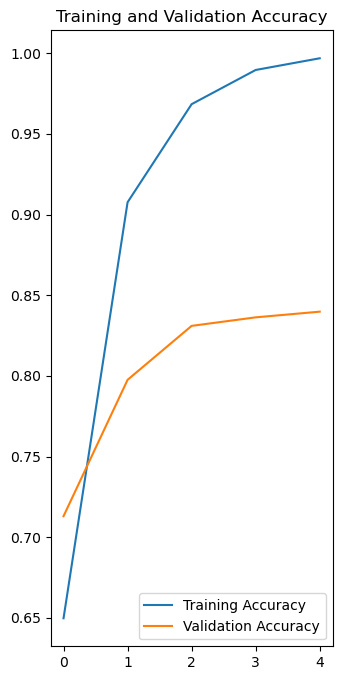

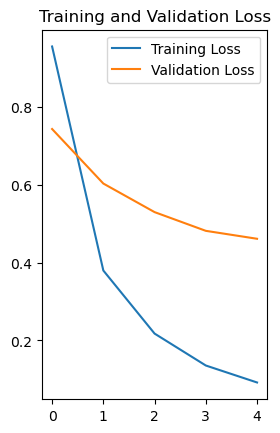

In [46]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
predictions = model.predict(test_set)

35/35 [==============================] - 202s 6s/step


In [48]:
y_pred = np.argmax(predictions, axis=-1)

In [49]:
test_set.class_indices

{'Ak': 0, 'Ala_Idris': 1, 'Buzgulu': 2, 'Dimnit': 3, 'Nazli': 4}

## Model Score

In [50]:
scores = model.evaluate(test_set, batch_size=16, verbose=2)

35/35 - 186s - loss: 0.5935 - accuracy: 0.7736 - 186s/epoch - 5s/step
